# CSGO round winner prediction

### data: https://www.kaggle.com/christianlillelund/csgo-round-winner-classification

# What is CSGO?

CSGO(Counter Strike Global-Offencive) is a round based tactical shooter between CT(Counter terrorist) and T(Terrorist) where we buy equipments usig in game cash that is provided by the game in each round. The overall goal is that the terrorist must plant a bomb while the counter terrorist must stop them or defuse the bomb.

## Importing libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier 

## importing data

In [71]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [72]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


## Data preprocessing

In [73]:
df.isnull().sum() # finding nulls

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

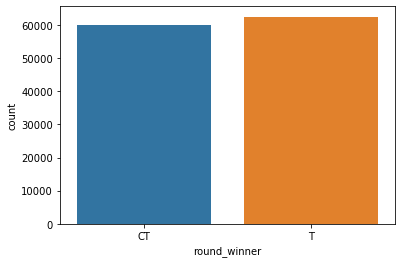

In [74]:
sns.countplot(df['round_winner'])

The data is quiet evenly split on the label column

In [75]:
col = df.columns

In [76]:
# checking for columns for only one value
t=[]
for i in col:
    t.append(df[i].nunique())


In [77]:
# all the columns with only one value
temp =[]
for i in range(len(t)):
    if t[i]==1:
        temp.append(i)
        print(i)

22
30
37
52
58
60


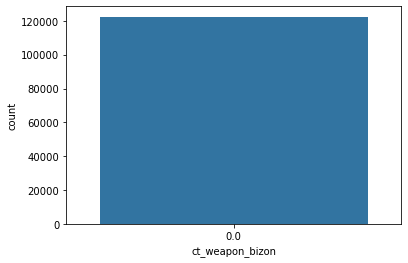

In [78]:
sns.countplot(df[col[22]])

In [79]:
df.drop([col[22], col[30], col[37], col[52], col[58], col[60]], axis = 1, inplace = True) # dropping those columns
print(col[22])
print(col[30])
print(col[37])
print(col[52])
print(col[58])
print(col[60])

ct_weapon_bizon
ct_weapon_g3sg1
t_weapon_m249
ct_weapon_negev
ct_weapon_r8revolver
ct_weapon_sawedoff


In [80]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


### label encoding all categorical values

In [81]:
label_encoder = preprocessing.LabelEncoder() 
df['map'] = label_encoder.fit_transform(df['map'])

In [82]:
df['bomb_planted'] = label_encoder.fit_transform(df['bomb_planted'])

In [83]:
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])

In [84]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [85]:
col = df.columns

In [86]:
c = []
for i in col:
    c.append(df['round_winner'].corr(df[i]))

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 91 columns):
time_left                       122410 non-null float64
ct_score                        122410 non-null float64
t_score                         122410 non-null float64
map                             122410 non-null int32
bomb_planted                    122410 non-null int64
ct_health                       122410 non-null float64
t_health                        122410 non-null float64
ct_armor                        122410 non-null float64
t_armor                         122410 non-null float64
ct_money                        122410 non-null float64
t_money                         122410 non-null float64
ct_helmets                      122410 non-null float64
t_helmets                       122410 non-null float64
ct_defuse_kits                  122410 non-null float64
ct_players_alive                122410 non-null float64
t_players_alive                 122410 non-null float

### Normalizing the data using Standard Scalar

In [88]:
standscl = preprocessing.StandardScaler()

In [89]:
standscl.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [90]:
standscl.transform(df)

array([[ 1.41582771, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       [ 1.06753073, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       [-0.03409385, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       ...,
       [ 0.31291789,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622],
       [-0.0542903 ,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622],
       [-0.4214985 ,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622]])

In [91]:
df = standscl.transform(df)

In [92]:
df = pd.DataFrame(df, columns = col)

In [93]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,1.415828,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
1,1.067531,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,...,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
2,-0.034094,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
3,-0.401302,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
4,1.415277,-1.191823,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-0.714160,-1.709542,0.763351,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819


In [94]:
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])

### Splitting the data into X and Y

In [95]:
x = df.drop('round_winner', axis = 1)

In [96]:
x.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.415828,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
1,1.067531,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,...,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
2,-0.034094,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
3,-0.401302,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
4,1.415277,-1.191823,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-0.714160,-1.709542,0.763351,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855


In [97]:
y = df['round_winner']

In [98]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: round_winner, dtype: int64

### Train Test Split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Training and Evaluation

In [100]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)
pred_1 = model_1.predict(x_test)
cr1    = classification_report(y_test,pred_1)
print(cr1)

C:\Users\ananth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



In [101]:
model_3 = DecisionTreeClassifier()
model_3.fit(x_train,y_train)
pred_3 = model_3.predict(x_test)
cr3    = classification_report(y_test,pred_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     12004
           1       0.82      0.82      0.82     12478

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482



In [102]:
model_4 = RandomForestClassifier()
model_4.fit(x_train,y_train)
pred_4 = model_4.predict(x_test)
cr4    = classification_report(y_test,pred_4)
print(cr4)

C:\Users\ananth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.82      0.88      0.85     12004
           1       0.88      0.82      0.85     12478

    accuracy                           0.85     24482
   macro avg       0.85      0.85      0.85     24482
weighted avg       0.85      0.85      0.85     24482



In [103]:
model_5 = XGBClassifier()
model_5.fit(x_train,y_train)
pred_5 = model_5.predict(x_test)
cr5    = classification_report(y_test,pred_5)
print(cr5)

              precision    recall  f1-score   support

           0       0.73      0.80      0.76     12004
           1       0.79      0.72      0.75     12478

    accuracy                           0.76     24482
   macro avg       0.76      0.76      0.76     24482
weighted avg       0.76      0.76      0.76     24482



In [104]:
model_6 = MLPClassifier()
model_6.fit(x_train,y_train)
pred_6 = model_6.predict(x_test)
cr6    = classification_report(y_test,pred_6)
print(cr6)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79     12004
           1       0.79      0.83      0.81     12478

    accuracy                           0.80     24482
   macro avg       0.80      0.80      0.80     24482
weighted avg       0.80      0.80      0.80     24482



C:\Users\ananth\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [134]:
print('Optimal accuracy for random forest classifier:', str(round(accuracy_score(y_test,pred_4), 3)*100) + '%')

Optimal accuracy for random forest classifier: 84.8%
